### Import libraries

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
data = pd.read_csv("petrol_consumption.csv") 

In [7]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [53]:
data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [8]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [9]:
data.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [10]:
data2 = data.copy()

### Seperating X and Y values

In [25]:
X = data2[['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)']]
y = data2['Petrol_Consumption']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-29.308703
Average_income,-0.070840
Population_Driver_licence(%),1430.565028


In [30]:
regressor.intercept_

288.61194481858024

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,475.009063
4,410,520.746645
26,577,593.837289
30,571,566.627853
32,577,664.027455
37,704,645.700518
34,487,500.905660
40,587,663.819704
7,467,482.121399
10,580,501.285450


In [33]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

Residual sum of squares: 39539.24


In [34]:
regressor.score(X,y)

0.6735215424731941

'Average_income', 'Paved_Highways',

In [20]:
model = sm.OLS(y,X).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     867.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.17e-41
Time:                        22:49:43   Log-Likelihood:                -269.00
No. Observations:                  48   AIC:                             546.0
Df Residuals:                      44   BIC:                             553.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -14.2390      8.414     -1.692      0.098     -31.196       2.718
Average_income                  -0.0594      0.017     -3.404      0.001      -0.095      -0.024
Paved_Highways                   0.0012      0.003      0.404      0.688      -0.005       0.007
Population_Driver_licence(%)  1630.8913    130.969     12.452      0.000    1366.941    1894.842
==============================================================================
Omnibus:                        9.750   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.310
Skew:                           0.880   Prob(JB):                      0.00952
Kurtosis:                       4.247   Cond. No.                     1.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
x = sm.add_constant(X)

In [36]:
model = sm.OLS(y,x).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     30.44
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           8.23e-11
Time:                        22:59:51   Log-Likelihood:                -267.08
No. Observations:                  48   AIC:                             542.2
Df Residuals:                      44   BIC:                             549.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          307.3279    156.831      1.960      0.056      -8.744     623.399
Petrol_tax                     -29.4838     10.584     -2.786      0.008     -50.814      -8.154
Average_income                  -0.0680      0.017     -3.999      0.000      -0.102      -0.034
Population_Driver_licence(%)  1374.7684    183.670      7.485      0.000    1004.607    1744.930
==============================================================================
Omnibus:                       16.778   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.643
Skew:                           1.163   Prob(JB):                     1.21e-05
Kurtosis:                       5.432   Cond. No.                     1.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

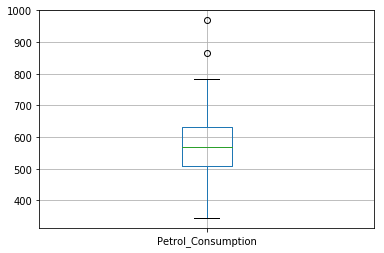

In [38]:
data2.boxplot(['Petrol_Consumption'])

In [39]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [40]:
    data_outlier = remove_outlier(data2,"Petrol_Consumption")

In [41]:
data_outlier = remove_outlier(data_outlier,"Petrol_tax")
data_outlier = remove_outlier(data_outlier,"Average_income")
data_outlier = remove_outlier(data_outlier,"Paved_Highways")
data_outlier = remove_outlier(data_outlier,"Population_Driver_licence(%)")

In [42]:
data_outlier.shape

(43, 5)

In [43]:
data_outlier.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.090934,-0.489964,-0.263974,-0.422414
Average_income,0.090934,1.000000,0.131251,0.023500,-0.575419
Paved_Highways,-0.489964,0.131251,1.000000,-0.037168,0.054160
Population_Driver_licence(%),-0.263974,0.023500,-0.037168,1.000000,0.534119
Petrol_Consumption,-0.422414,-0.575419,0.054160,0.534119,1.000000


In [44]:
X = data_outlier[['Average_income',
       'Population_Driver_licence(%)','Petrol_tax']]
y = data_outlier['Petrol_Consumption']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Average_income,-0.082442
Population_Driver_licence(%),951.920607
Petrol_tax,-20.275472


In [48]:
y_pred = regressor.predict(X_test)

In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
32,577,660.781677
40,587,612.485174
29,534,515.239331
4,410,518.274296
10,580,505.606941
27,631,607.319501
30,571,576.373065
11,471,450.390441
41,699,617.890425


In [51]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

Residual sum of squares: 32871.63


In [52]:
regressor.score(X,y)

0.6834927891537446